# Descriptives

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)
train=pd.read_csv("C:/Universitaet Mannheim/MMDS 3. Semester/DM2/DMC_2019_task/train.csv", sep="|")
#test=pd.read_csv("C:/Users/University/Desktop/DM2/DMC_2019_task/test.csv", sep="|")

In [3]:
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [4]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [5]:
# remarks: original features


# "grandTotal" contains the total VALUE of the action

# "quantityModifications"
# Assumption: Counts the overall modification of quantities per row/action.

# Focusing on actions with just 1 or 2 'totalScanned':
# The products seem to have arbitrary costs (values that do not end on .99 or .00)

# "trustLevel" might be constructed with the frequency a customer has bought and payed with card in the past

# Max of "quantityModifications" = 5. Seems rather low to me 

In [6]:
# manual feature generation


# totalScanned:
train['totalScanned'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']

# avgValuePerScan:
train['avgTimePerScan'] = 1/ train['scannedLineItemsPerSecond']
train['avgValuePerScan'] = train['avgTimePerScan'] * train['valuePerSecond']
# Same values:
# train['avgValuePerScan2'] = train['grandTotal'] / train['totalScanned']



# manual feature generation - "totalScanned" ratios

# "lineItemVoidsPerPosition" = "lineItemVoids" / "totalScanned"
# Ratio of voided scans given all scans

# withoutRegisPerPosition
train['withoutRegisPerPosition'] = train['scansWithoutRegistration'] / train['totalScanned']
# ratio of scansWithoutRegis in totalScan
# equivalent to lineItemVoidsPerPosition
# Might indicate how new or ambivalent a customer is. Expected to be higher for low "trustLevel"

# quantiModPerPosition
train['quantiModPerPosition'] = train['quantityModifications'] / train['totalScanned']
# ratio of quanityMods in totalScan



# manual feature generation - "grandTotal" ratios

# lineItemVoidsPerTotal
train['lineItemVoidsPerTotal'] = train['lineItemVoids'] / train['grandTotal']

# withoutRegisPerTotal
train['withoutRegisPerTotal'] = train['scansWithoutRegistration'] / train['grandTotal']

# quantiModPerTotal
train['quantiModPerTotal'] = train['quantityModifications'] / train['grandTotal']



# manual feature generation - "totalScanTimeInSeconds" ratios

# lineItemVoidsPerTime
train['lineItemVoidsPerTime'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']

# withoutRegisPerTime
train['withoutRegisPerTime'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']

# quantiModPerTime
train['quantiModPerTime'] = train['quantityModifications'] / train['totalScanTimeInSeconds']

In [7]:
#df_v = train[train[('avgValuePerScan')].round() != train[('avgValuePerScan2')].round()]
#df_v

totalScanTimeInSeconds


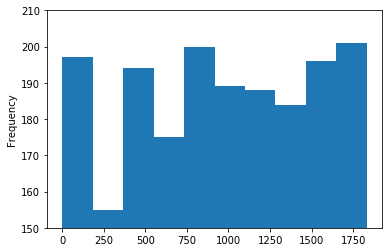

quantityModifications


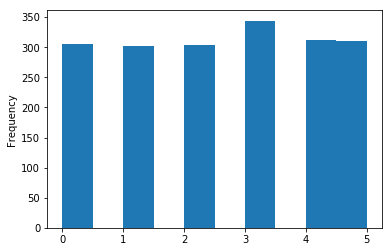

grandTotal


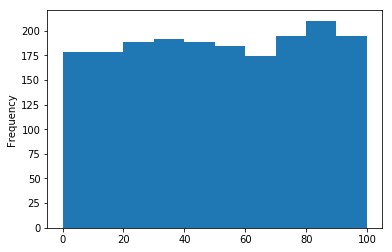

lineItemVoids


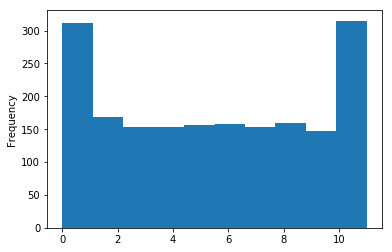

totalScanned


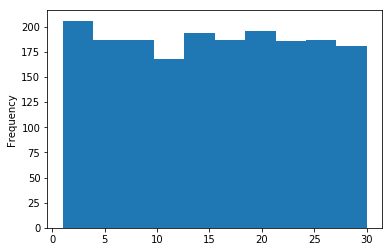

lineItemVoidsPerPosition<1


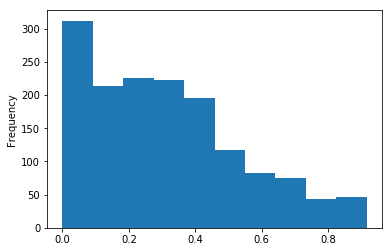

lineItemVoidsPerPosition<1 & fraud=0


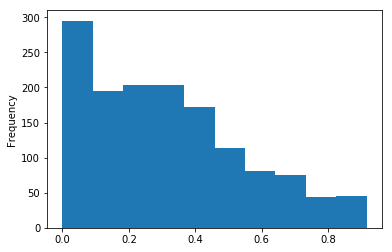

lineItemVoidsPerPosition<1 & fraud=1


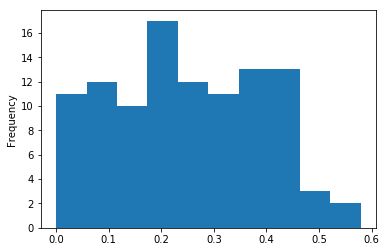

scannedLineItemsPerSecond<0.1


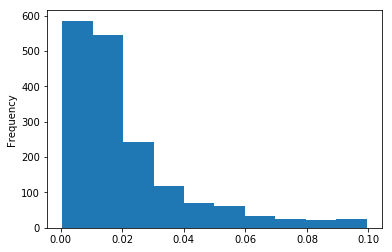

In [8]:
# Distributions


print('totalScanTimeInSeconds')
train[('totalScanTimeInSeconds')].plot.hist(ylim=(150,210))
plt.show()

print('quantityModifications')
train[('quantityModifications')].plot.hist()
plt.show()

print('grandTotal')
train[('grandTotal')].plot.hist()
plt.show()

print('lineItemVoids')
train[('lineItemVoids')].plot.hist()
plt.show()

print('totalScanned')
train[('totalScanned')].plot.hist()
plt.show()

print('lineItemVoidsPerPosition<1')
train[train[('lineItemVoidsPerPosition')]<1]['lineItemVoidsPerPosition'].plot.hist()
plt.show()
#
print('lineItemVoidsPerPosition<1 & fraud=0')
helper = train[train[('fraud')]==0]
helper[helper[('lineItemVoidsPerPosition')]<1]['lineItemVoidsPerPosition'].plot.hist()
plt.show()
#
print('lineItemVoidsPerPosition<1 & fraud=1')
helper2 = train[train[('fraud')]==1]
helper2[helper2[('lineItemVoidsPerPosition')]<1]['lineItemVoidsPerPosition'].plot.hist()
plt.show()

print('scannedLineItemsPerSecond<0.1')
train[train[('scannedLineItemsPerSecond')]<0.1]['scannedLineItemsPerSecond'].plot.hist()
plt.show()

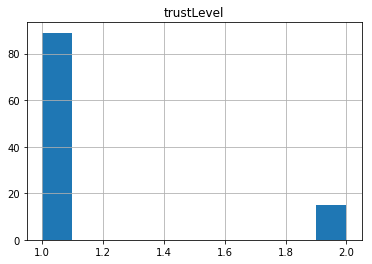

1775 104


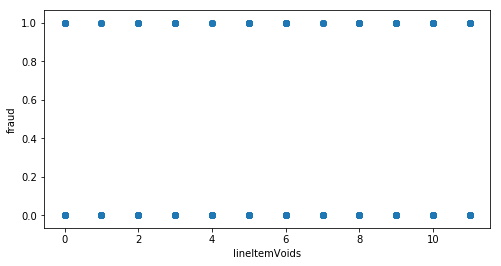

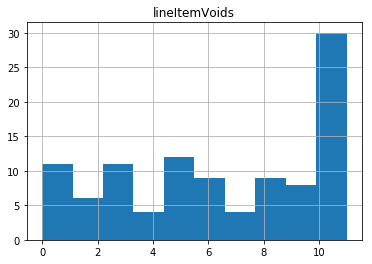

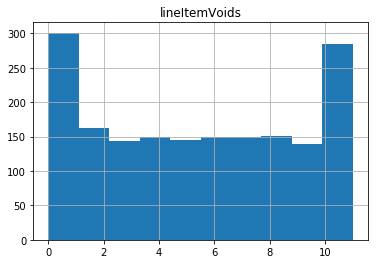

In [9]:
#correlations cell #1


# fraud & trustLevel
#
# fig, ax = plt.subplots(figsize=(8,4))
# ax.scatter(train['trustLevel'], train['fraud'])
# ax.set_xlabel('trustLevel')
# ax.set_ylabel('fraud')
# plt.show()
#
df_h2 = train[train[('fraud')]==1]
df_h2.hist('trustLevel')
plt.show()

print(len(train[train[('fraud')]==0]), len(train[train[('fraud')]==1]))
# Trustlevels above 2 as always display non-fraud

# # fraud & totalScanTimeInSeconds
# #
# fig, ax = plt.subplots(figsize=(8,4))
# ax.scatter(train['totalScanTimeInSeconds'], train['fraud'])
# ax.set_xlabel('totalScanTimeInSeconds')
# ax.set_ylabel('fraud')
# plt.show()

# # fraud & grandTotal
# #
# fig, ax = plt.subplots(figsize=(8,4))
# ax.scatter(train['grandTotal'], train['fraud'])
# ax.set_xlabel('grandTotal')
# ax.set_ylabel('fraud')
# plt.show()

# fraud & lineItemVoids
#
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(train['lineItemVoids'], train['fraud'])
ax.set_xlabel('lineItemVoids')
ax.set_ylabel('fraud')
plt.show()
#
helper3 = train[train[('fraud')]==1]
helper3.hist('lineItemVoids')
plt.show()
#
helper4 = train[train[('fraud')]==0]
helper4.hist('lineItemVoids')
plt.show()
# From all customers commiting fraud, there seem to be many with a very high item voidations
# Since the same can be said about the customers not commiting fraud, it might not be relevant,
# But from those not commiting fraud, there are many with with 0 voidations

# fraud & scansWithoutRegistration
#
# fig, ax = plt.subplots(figsize=(8,4))
# ax.scatter(train['scansWithoutRegistration'], train['fraud'])
# ax.set_xlabel('scansWithoutRegistration')
# ax.set_ylabel('fraud')
# plt.show()
#
# helper3.hist('scansWithoutRegistration')
# plt.show()
# 
# helper4.hist('scansWithoutRegistration')
# plt.show()

# # fraud & quantityModifications
# #
# fig, ax = plt.subplots(figsize=(8,4))
# ax.scatter(train['quantityModifications'], train['fraud'])
# ax.set_xlabel('quantityModifications')
# ax.set_ylabel('fraud')
# plt.show()
# #
# df_h3 = train[train[('fraud')]==1]
# df_h3.hist('quantityModifications')
# plt.show()
# #
# df_h4 = train[train[('fraud')]==0]
# df_h4.hist('quantityModifications')
# plt.show()


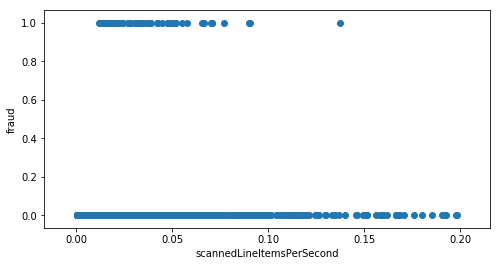

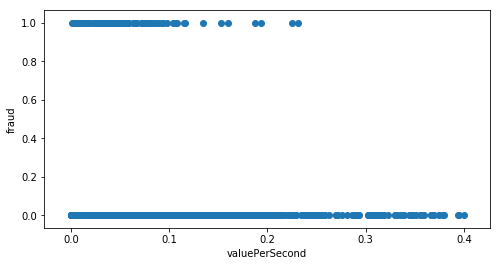

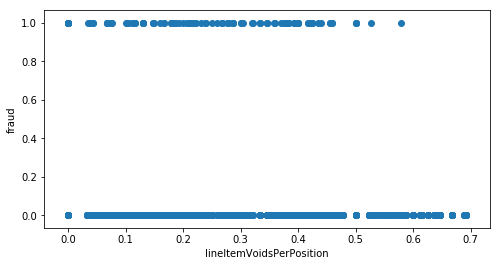

In [10]:
#correlations cell #2


# fraud & scannedLineItemsPerSecond
#
helper5 = train[train[('scannedLineItemsPerSecond')]<0.2]
#
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(helper5['scannedLineItemsPerSecond'], helper5['fraud'])
ax.set_xlabel('scannedLineItemsPerSecond')
ax.set_ylabel('fraud')
plt.show()

# fraud & valuePerSecond
#
helper6 = train[train[('valuePerSecond')]<0.4]
#
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(helper6['valuePerSecond'], helper6['fraud'])
ax.set_xlabel('valuePerSecond')
ax.set_ylabel('fraud')
plt.show()



# fraud & lineItemVoidsPerPosition
#
helper7 = train[train[('lineItemVoidsPerPosition')]<0.7]
#
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(helper7['lineItemVoidsPerPosition'], helper7['fraud'])
ax.set_xlabel('lineItemVoidsPerPosition')
ax.set_ylabel('fraud')
plt.show()

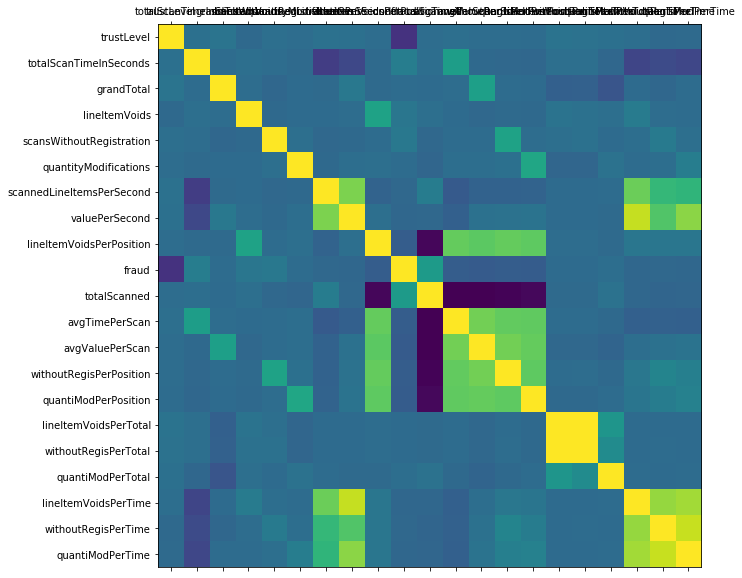

In [11]:
# Heatmap Type1


def plot_corr(train,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = train.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(train, 10)

In [12]:
# Heatmap Type2


corr = train.corr()
corr.style.background_gradient().set_precision(2)
                                #.set_properties(**{'font-size': '0pt'})


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,totalScanned,avgTimePerScan,avgValuePerScan,withoutRegisPerPosition,quantiModPerPosition,lineItemVoidsPerTotal,withoutRegisPerTotal,quantiModPerTotal,lineItemVoidsPerTime,withoutRegisPerTime,quantiModPerTime
trustLevel,1,0.025,0.048,-0.017,0.017,0.0065,0.031,0.028,0.0092,-0.32,0.0064,0.019,0.0083,0.0048,0.0015,0.042,0.039,0.025,0.012,-0.015,-0.014
totalScanTimeInSeconds,0.025,1,-0.0012,0.019,0.0091,-0.011,-0.26,-0.21,-0.012,0.11,0.0098,0.32,-0.019,-0.021,-0.029,0.016,0.019,-0.031,-0.22,-0.19,-0.21
grandTotal,0.048,-0.0012,1,0.0063,-0.031,-0.0082,-0.012,0.076,-0.0089,0.0014,-0.007,0.0049,0.33,0.0036,-0.0049,-0.069,-0.068,-0.14,-0.0053,-0.03,0.00066
lineItemVoids,-0.017,0.019,0.0063,1,-0.017,-0.0072,-0.0044,0.0051,0.35,0.063,0.022,-0.0068,-0.026,-0.014,-0.016,0.043,0.031,0.019,0.094,0.0071,8.1e-05
scansWithoutRegistration,0.017,0.0091,-0.031,-0.017,1,0.019,-0.024,-0.019,0.0028,0.074,-0.027,0.0019,0.003,0.35,0.004,0.018,0.03,-0.0071,0.0097,0.093,0.016
quantityModifications,0.0065,-0.011,-0.0082,-0.0072,0.019,1,-0.015,0.011,0.018,-0.00086,-0.036,0.013,0.014,0.023,0.37,-0.038,-0.038,0.038,0.00075,0.013,0.11
scannedLineItemsPerSecond,0.031,-0.26,-0.012,-0.0044,-0.024,-0.015,1,0.69,-0.056,-0.023,0.1,-0.11,-0.062,-0.057,-0.056,-0.0044,-0.0044,0.0011,0.65,0.48,0.47
valuePerSecond,0.028,-0.21,0.076,0.0051,-0.019,0.011,0.69,1,0.02,-0.029,-0.022,-0.07,0.033,0.038,0.04,-0.0064,-0.0062,-0.013,0.86,0.58,0.73
lineItemVoidsPerPosition,0.0092,-0.012,-0.0089,0.35,0.0028,0.018,-0.056,0.02,1,-0.09,-0.52,0.64,0.61,0.63,0.62,0.0083,0.0047,-0.012,0.061,0.059,0.06
fraud,-0.32,0.11,0.0014,0.063,0.074,-0.00086,-0.023,-0.029,-0.09,1,0.3,-0.091,-0.1,-0.091,-0.094,-0.0035,-0.0038,0.011,-0.027,-0.023,-0.028


In [13]:
train.isna().any() 

trustLevel                   False
totalScanTimeInSeconds       False
grandTotal                   False
lineItemVoids                False
scansWithoutRegistration     False
quantityModifications        False
scannedLineItemsPerSecond    False
valuePerSecond               False
lineItemVoidsPerPosition     False
fraud                        False
totalScanned                 False
avgTimePerScan               False
avgValuePerScan              False
withoutRegisPerPosition      False
quantiModPerPosition         False
lineItemVoidsPerTotal        False
withoutRegisPerTotal         False
quantiModPerTotal            False
lineItemVoidsPerTime         False
withoutRegisPerTime          False
quantiModPerTime             False
dtype: bool